# 딥러닝 강의 - softmax classification과 cnn 

In [1]:
#### 필요한 기능 import ####

import tensorflow as tf
import random

from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

In [2]:
#### 손글씨 숫자인식 데이터 받아오기 / one hot encoding 활용 ####
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

# softmax classification-basic NN

### 텐서플로우 노드를 만들어봅시다.

In [3]:
#### 텐서플로우 특성상 딥러닝을 구현할 수 있는 얼개를 먼저 짜놓고 실제 학습 돌입 ####
#### 먼저 전체적인 구조를 짜는 부분 ####
#### 사진의 픽셀(784)을 1열 벡터로 받아옴 ####

x=tf.placeholder(tf.float32,[None,784],name='x')
y=tf.placeholder(tf.float32,[None,10],name='y')

### 가설함수 H(x)=Wx+b를 만들어 봅시다. 

In [4]:

with tf.name_scope("layer1"):
    #### 인공신경망의 첫번째 레이어는 시그모이드 함수로 구성 ####
    #### y = Wx + b 형태이므로 계수를 weight1, 절편을 bias1으로 지정 ####
    W1=tf.Variable(tf.random_normal([784,28]),name='weight1')
    b1=tf.Variable(tf.random_normal([28]),name='bias1')
    layer1=tf.sigmoid(tf.matmul(x,W1)+b1)
    
    
    #summary.histogram은 tensorboard에서 표를 그릴때 사용하는 것으로 
    #나중에 tensorboard를 배우고 싶으신 분들이 있을까봐 참고용으로 지우지 않고 넣어두었습니다. 
    #w1_hist=tf.summary.histogram("weighth1",W1)
    #b1_hist=tf.summary.histogram("biash1",b1)
    #layer1_hist=tf.summary.histogram("layer1",layer1)

    ####두번째 레이어 지정 ####
with tf.name_scope("layer2"):
    W2=tf.Variable(tf.random_normal([28,10]),name='weight2')
    b2=tf.Variable(tf.random_normal([10]),name='bias2')
    
    #### 첫번째 레이어의 아웃풋을 두번째 레이어의 인풋으로 활용 #### 
    logits=tf.matmul(layer1,W2)+b2
    #### 그 결과를 소프트맥스 거치게 함 ####
    hypo=tf.nn.softmax(logits)
   
    #w2_hist=tf.summary.histogram("weighth2",W2)
    #b2_hist=tf.summary.histogram("biash2",b2)
    #logits_hist=tf.summary.histogram("logits",logits)
    

Instructions for updating:
Colocations handled automatically by placer.


### cost함수를 만들어 봅시다

In [5]:
#### optimization problem의 목적함수(objective function) 정의 ####

with tf.name_scope("cost"):
    cost=tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=y)
    #cost_sum=tf.summary.scalar("cost",cost)

### cost를 줄이는 optimizer로 우리가 잘 아는 경사하강법(gradient descent)을 사용합니다.

In [6]:
#### 일반적인 GDM 활용하여 cost function 최소화 optimization ####

with tf.name_scope("train"):
    optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

### 우리가 만든 가설함수의 정확성을 확인하기 위한 코드입니다.

In [7]:
#### 앞서 정의한 소프트맥스 결괏값 중 가장 높은 값(가장 높은 확률로 예측)을 우리의 예측값으로 선택 ####
prediction=tf.argmax(hypo,axis=1)

#### 우리의 예측값과 실제 값이 얼마나 맞는지 확인 ####
is_correct=tf.equal(prediction,tf.argmax(y,1))
#### 우리 학습모델의 예측정확성 측정 ####
accuracy=tf.reduce_mean(tf.cast(is_correct,tf.float32))
#accuracy_sum=tf.summary.scalar("accuracy",accuracy)

### 지금까지는 가설함수와 층을 만들고, 코스트를 줄이는 방식(여기서는 경사하강법)을 정하는 등 텐서플로우 상에서 'graph를 그린 것'입니다. 
### 이제부터 할 것은 실제로 그 안에서 가설함수의 코스트를 줄이는 방향으로 학습을 진행하라는 코드를 볼 것입니다.  

Accuracy 0.8613
Label:  [1]
Prediction:  [1]


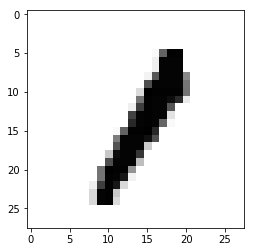

Accuracy 0.8905
Label:  [0]
Prediction:  [0]


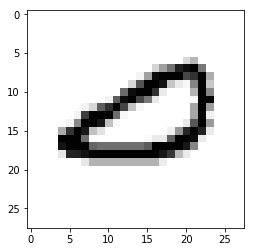

Accuracy 0.9021
Label:  [8]
Prediction:  [8]


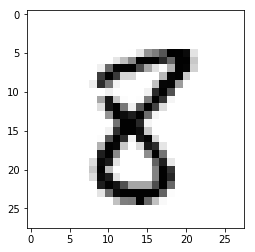

Accuracy 0.9071
Label:  [7]
Prediction:  [7]


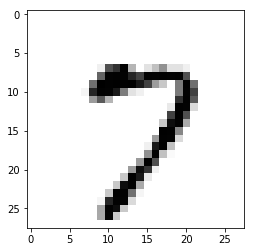

Accuracy 0.9135
Label:  [4]
Prediction:  [4]


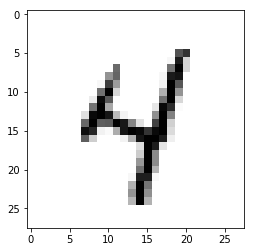

Accuracy 0.9195
Label:  [2]
Prediction:  [2]


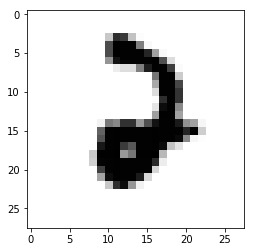

Accuracy 0.9208
Label:  [6]
Prediction:  [6]


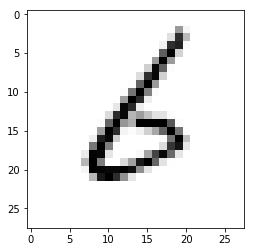

Accuracy 0.9241
Label:  [6]
Prediction:  [6]


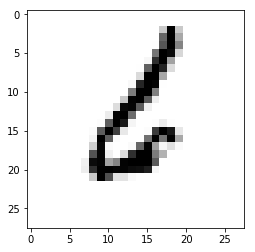

Accuracy 0.9249
Label:  [5]
Prediction:  [5]


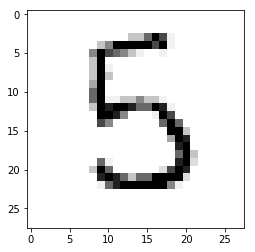

Accuracy 0.927
Label:  [8]
Prediction:  [8]


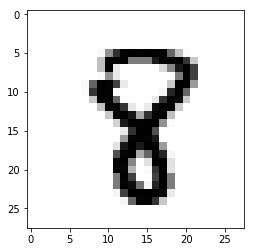

Accuracy 0.9277
Label:  [3]
Prediction:  [3]


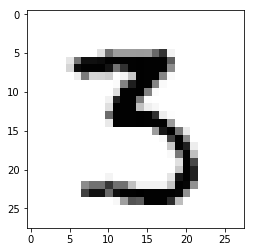

Accuracy 0.9299
Label:  [9]
Prediction:  [9]


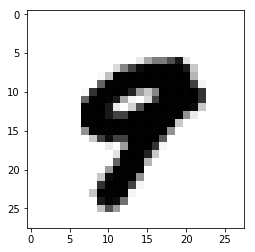

Accuracy 0.931
Label:  [8]
Prediction:  [8]


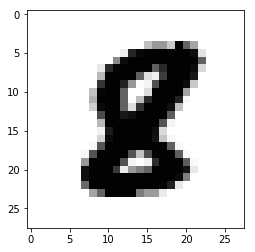

Accuracy 0.9334
Label:  [7]
Prediction:  [7]


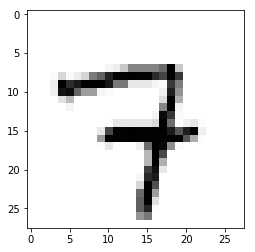

Accuracy 0.9332
Label:  [8]
Prediction:  [8]


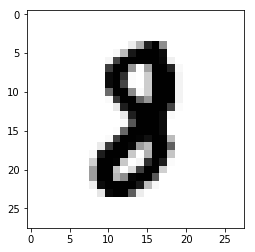

In [8]:
 
with tf.Session() as sess:
    #### 게임을 시작하지! 
    
    #### 반복횟수, 한번에 검토할 사이즈 등 파라미터 지정 ####
    iter_epoch=15
    batch_size=100
    
    
    #global_step=0
    #merged=tf.summary.merge([accuracy_sum,cost_sum])
    #writer=tf.summary.FileWriter('c:\\GH\\tensor')
    #writer.add_graph(sess.graph)
    #valid_x=mnist.validation.images
    #valid_y=mnist.validation.labels
    
    
    #전역 변수 initializer을 사용하여 우리가 만든 W등의 초기화를 미리 지정한 방식(이 경우 random_normal)으로 초기화해줍니다. 
    sess.run(tf.global_variables_initializer())
    
    
    #### iteration 시작 - 코스트를 최소화할 수 있는 optimizer 가동! ####
    for epoch in range(iter_epoch):
        avg_cost=0
        total_batch=int(mnist.train.num_examples/batch_size)
        #total_batch는 전체 train 데이터 개수를 미리 설정한 batch_size(이 경우 100)으로 나눈 값으로 
        #전체 train을 1번 완료 하려면 batch를 100개씩 넣는 작업을 몇번 반복해야하는 것인지를 뜻합니다 
        
        for i in range(total_batch):
            
            batch_x,batch_y=mnist.train.next_batch(batch_size)
            #train.next_batch는 다음 batch만큼의 데이터를 가져와서 batch_x,batch_y에 넣습니다.
            #이때 물론 batch_y는 각각의 사진의 실제 답,label입니다. 
            
            
            c,s,_=sess.run([cost,accuracy,optimizer],feed_dict={x:batch_x,y:batch_y})
            #cost, accuracy_sum에 batch만큼의 데이터를 집어넣어 줍니다. 이때 동시에 optimzer에도 넣어 cost를 줄여주는 학습을 진행합니다.
            #optimzer가 나타내는 값 자체는 중요하지 않기 때문에 _ 변수에 저장해주고 이런 _변수는 보통 활용하지 않을 변수에 사용합니다. 
            
            
            avg_cost+=c/total_batch
            #평균 비용은 각 cost를 반복횟수인 train_batch로 나누어서 구합니다.
            
            
            #s=sess.run(merged,feed_dict={x:valid_x,y:valid_y})  
            #writer.add_summary(s,global_step)  
            #global_step+=1
      
       # print('Epoch:','%d' %(epoch+1), 'cost=','{0}'.format(avg_cost))
        print("Accuracy",accuracy.eval(session=sess,feed_dict={x:mnist.test.images,y:mnist.test.labels}))
        
        r = random.randint(0, mnist.test.num_examples - 1)
        print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
        print("Prediction: ", sess.run(
            tf.argmax(logits, 1), feed_dict={x: mnist.test.images[r:r + 1]}))

        plt.imshow(mnist.test.images[r:r + 1].
                   reshape(28, 28), cmap='Greys', interpolation='nearest')
        plt.show()

# CNN

In [9]:
#### 같은 과정을 반복하거나 할 때 랜덤성을 확보하기 위해 시드 정의 ####
tf.set_random_seed(777)  # reproducibility를 위해 지정해둡니다. 

#mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)


# parameters

#### 기본적인 학습 파라미터 지정 ####
learning_rate = 0.001
training_epochs = 15
batch_size = 100


In [10]:
# dropout (keep_prob) rate  0.7~0.5 가 train시 권장되고 test 시에는 1을 사용해야합니다. 이 부분은 뒤에서 ppt와 함께 다시 설명해드리겠습니다. 
keep_prob = tf.placeholder(tf.float32)

### CNN 기본 노드들을 만들어봅시다

In [11]:
#softmax 코드 부분과 다른점이 뭘까요..!?

#### CNN은 자그마한 유닛을 만들어서 훑는 방식이므로 기본적인 ANN 떄와 달리 X_img 지정해주어야 함 ####
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])   # img 28x28x1 (흑백 사진이기에, 컬러였으면 RGB로 28*28*3 이었을 것입니다)
Y = tf.placeholder(tf.float32, [None, 10])

### cnn 필터들과 다층 layer를 만들어봅시다

In [12]:
# L1 ImgIn shape=(?, 28, 28, 1)
#필터의 개별 크기는 [3,3,1(이는 흑백이어서,컬러면 3)]인 것이고 필터의 총 개수가 32개인것입니다. 

#### 필터 assign ####
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
#    Conv     -> (?, 28, 28, 32)
#    Pool     -> (?, 14, 14, 32)

#### 주어진 filter unit을 옆으로 밀어가며 학습 진행, 보폭/패딩(테두리 설정) ####
#### sigmoid 대신 rectified linear unit 활용한 점 note ####
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)      #### Overfitting 방지하기 위해 확률적으로 nod 끊어버림 ####
'''
Tensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)
Tensor("dropout/mul:0", shape=(?, 14, 14, 32), dtype=float32)
'''

#### 다음 레이어 학습 진행 ####

# L2 ImgIn shape=(?, 14, 14, 32)
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
#    Conv      ->(?, 14, 14, 64)
#    Pool      ->(?, 7, 7, 64)
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)
'''
Tensor("Conv2D_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)
Tensor("dropout_1/mul:0", shape=(?, 7, 7, 64), dtype=float32)
'''

#### 세번째 레이어 학습 진행 ####

# L3 ImgIn shape=(?, 7, 7, 64)
W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))
#    Conv      ->(?, 7, 7, 128)
#    Pool      ->(?, 4, 4, 128)
#    Reshape   ->(?, 4 * 4 * 128) # Flatten them for FC
L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME')
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[
                    1, 2, 2, 1], padding='SAME')
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)
L3_flat = tf.reshape(L3, [-1, 128 * 4 * 4])
#엇 왜 애써 사진 모양처럼 했던 것을 다시 flat하게 펼까요? 
#### 벡터 연산을 하기 위해서...? ####

'''
Tensor("Conv2D_2:0", shape=(?, 7, 7, 128), dtype=float32)
Tensor("Relu_2:0", shape=(?, 7, 7, 128), dtype=float32)
Tensor("MaxPool_2:0", shape=(?, 4, 4, 128), dtype=float32)
Tensor("dropout_2/mul:0", shape=(?, 4, 4, 128), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 2048), dtype=float32)
'''

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


'\nTensor("Conv2D_2:0", shape=(?, 7, 7, 128), dtype=float32)\nTensor("Relu_2:0", shape=(?, 7, 7, 128), dtype=float32)\nTensor("MaxPool_2:0", shape=(?, 4, 4, 128), dtype=float32)\nTensor("dropout_2/mul:0", shape=(?, 4, 4, 128), dtype=float32)\nTensor("Reshape_1:0", shape=(?, 2048), dtype=float32)\n'

### cnn 끝 부분에서 위에서 배웠던 softmax을 연결하여 학습시킵니다

In [13]:
# L4 FC 4x4x128 inputs -> 625 outputs
#random_normal을 쓰다가 Xavier_initializer을 쓰는 이유는 뭘까요?  
#### 우월한 performance ####
W4 = tf.get_variable("W4", shape=[128 * 4 * 4, 625],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([625]))
L4 = tf.nn.relu(tf.matmul(L3_flat, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)
'''
Tensor("Relu_3:0", shape=(?, 625), dtype=float32)
Tensor("dropout_3/mul:0", shape=(?, 625), dtype=float32)
'''
# L5 Final FC 625 inputs -> 10 outputs
W5 = tf.get_variable("W5", shape=[625, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L4, W5) + b5
'''
Tensor("add_1:0", shape=(?, 10), dtype=float32)
'''
#여기서 중요한 것.! 결국 최종적으로 마지막 logits은 10개의 라벨(0~9까지의 수)
#각각으로 예상할 확률로 만들어졌다는 것. ex: N(데이터 개수) * [1 2 3 2 5 1 0 1 2 3]

'\nTensor("add_1:0", shape=(?, 10), dtype=float32)\n'

In [14]:
#### 마지막은 다시 softmax_cross_entropy 활용해서 각각의 숫자에 대응될 확률 산출하는 방식 ####

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
#AdamOptimizer는 왜 사용할까요 ?
#### 학습 속도 차이가 심함 - AdamOptimizer 쓰는게 Global Minimum으로 더 빨리 나아갈 수 있음
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



### 본격적인 학습을 시작합니다

In [ ]:
# 이 부분은 학습하는데 시간이 오래 걸립니다. 

#### 게임 시작! ####
sess = tf.Session()
#sess = tf.Session()와  위에서 쓴 with tf.Session() as sess는 동일한 의미입니다. 단, with - as : 방법은 
#들여쓰기를 한 부분까지만 Session이 유지되고 그 후에는 Session이 닫힙니다. 
sess.run(tf.global_variables_initializer())

print('Learning started. It takes sometime.') #### 친절 ####
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch
        
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

In [ ]:

# 내 모델의 정확도를 측정해보고 그림을 그려서 확인해봅시다. 


#### 내 모델의 예측값과 실제 레이블 값 비교(지도학습) ####
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))

#### 학습 결과값 시각화 ####
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(logits, 1), feed_dict={X: mnist.test.images[r:r + 1], keep_prob: 1}))

plt.imshow(mnist.test.images[r:r + 1].
           reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()